# Title: Understanding Artificial Intelligence

# Summative Assignment: Portfolio of Work

# I. Introduction

### This notebook presents the processing of the second hand car sales dataset and making predictions about the selling price of cares. The exploratory data analysis will involve robust cleaning process of the dataset, analysisng it and building a model that will help predict the price of second hand car sales. The assignment is devided into 3 parts. The libraries made use of in this execise include;
 ### - Pandas
 ### - Numpy
 ### - Seaborn
 ### - Matplotlib
 ### - Sklearn
 ### - Scipy
 ### - csv
 ### - Warnings

## Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import csv
import scipy
from scipy import stats
from scipy.optimize import curve_fit #(Cajanding, 2021)
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import category_encoders as ce

# Exercise I: Analysis of Second Hand Car Sales

In [2]:
cardf = pd.read_csv("./car_sales_data.csv") # To read the dataset

In [3]:
cardf

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Puma,1.4,Diesel,1994,157846,2517
1,BMW,X3,2.0,Diesel,1999,311477,1220
2,BMW,X3,3.0,Diesel,2004,46905,18888
3,Toyota,Matrix,1.4,Hybrid,1985,226031,955
4,Ford,Puma,1.8,Diesel,1995,168255,2796
...,...,...,...,...,...,...,...
54995,Ford,Focus,1.6,Petrol,2004,130139,6301
54996,Ford,Fiesta,1.2,Petrol,1988,260534,416
54997,Toyota,Yaris,1.2,Hybrid,2010,57107,13763
54998,Ford,Puma,1.8,Hybrid,2011,66945,20061


### Description of Data Dictionary

#### 1. Manufacturer: The manufacturing comapny of the car
#### 2. Model: The make of the car or brand car name
#### 3. Engine size: The capacity of the engine
#### 4. Fuel type: The type of fuel used to run the car
#### 5. Year of manufacture: The year car was manufactured
#### 6. Mileage: The distance already covered by the car, indicative of the extent to which car has been used.
#### 7. Price: The assumed price at which the car was sold

## Exploratory Data Analysis (EDA)

In [4]:
cardf.info() # To see the data types and null values by column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         55000 non-null  object 
 1   Model                55000 non-null  object 
 2   Engine size          55000 non-null  float64
 3   Fuel type            55000 non-null  object 
 4   Year of manufacture  55000 non-null  int64  
 5   Mileage              55000 non-null  int64  
 6   Price                55000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ MB


### Description of Numerical Features

In [5]:
cardf.describe()

,Engine size,Year of manufacture,Mileage,Price
count,55000.000000,55000.000000,55000.000000,55000.000000
mean,1.767176,2004.141345,113101.190455,14065.765891
std,0.734582,9.631633,71442.884076,16307.403356
min,1.000000,1984.000000,1000.000000,43.000000
25%,1.400000,1996.000000,55384.000000,3144.000000
50%,1.600000,2004.000000,101872.500000,8158.000000
75%,2.000000,2012.000000,159582.000000,19470.250000
max,5.000000,2022.000000,457677.000000,167016.000000


### Description of Categorical Features

In [6]:
print("Categories in 'Manufacturer' variables: ", end = " ")
print(cardf["Manufacturer"].unique())
print("\n")

print("Categories in 'Model' variables: ", end = " ")
print(cardf["Model"].unique())
print("\n")

print("Categories in 'Engine size' variables: ", end = " ")
print(cardf["Engine size"].unique())
print("\n")

print("Categories in 'Fuel type' variables: ", end = " ")
print(cardf["Fuel type"].unique())
print("\n")

print("Categories in 'Year of manufacture' variables: ", end = " ")
print(cardf["Year of manufacture"].unique())
print("\n")

print("Categories in 'Mileage' variables: ", end = " ")
print(cardf["Mileage"].unique())
print("\n")

print("Categories in 'Price' variables: ", end = " ")
print(cardf["Price"].unique())

Categories in 'Manufacturer' variables:  ['Ford' 'BMW' 'Toyota' 'Nissan' 'Porsche']


Categories in 'Model' variables:  ['Puma' 'X3' 'Matrix' 'Murano' 'Altima' 'Juke' 'Corolla' 'Focus' 'Fiesta'
 'Z4' 'Yaris' '911' 'Cayenne' '718 Cayman' 'M5']


Categories in 'Engine size' variables:  [1.4 2.  3.  1.8 1.  1.2 2.2 1.6 2.4 2.6 4.  3.5 4.4 5. ]


Categories in 'Fuel type' variables:  ['Diesel' 'Hybrid' 'Petrol']


Categories in 'Year of manufacture' variables:  [1994 1999 2004 1985 1995 2009 1986 2003 1992 2001 2020 2018 2016 2006
 2011 2005 1996 2000 2008 2013 1988 1993 2015 2007 1990 2019 2014 1984
 1998 2010 1989 2021 2002 2012 2017 1997 1987 1991 2022]


Categories in 'Mileage' variables:  [157846 311477  46905 ... 130139 260534  57107]


Categories in 'Price' variables:  [  2517   1220  18888 ... 128768  17739   2246]


## Data Cleaning

### 1. Checking for Null Values

In [7]:
cardf.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

### There are no null values in the dataset

### 2. Checking for Duplicates

In [8]:
cardf.duplicated().sum()

12

In [9]:
dup_rows = cardf[cardf.duplicated()]

print("Duplicated Rows :")
dup_rows

Duplicated Rows :


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
3024,BMW,M5,4.4,Petrol,2010,6500,70155
20668,Toyota,Yaris,1.4,Hybrid,2009,7000,18589
30102,Ford,Fiesta,1.4,Petrol,2005,9000,9700
30888,Ford,Fiesta,1.4,Petrol,1994,167719,1536
34980,Ford,Fiesta,1.4,Petrol,2012,5500,15751
40891,Ford,Fiesta,1.4,Petrol,2012,5500,15751
45284,Ford,Fiesta,1.4,Petrol,2013,71668,11361
46832,Toyota,Matrix,1.0,Hybrid,2013,5000,26941
47336,Nissan,Juke,1.2,Petrol,2011,59070,11212
54065,Ford,Puma,1.6,Diesel,2007,80484,11566


#### It can be seen from the above codes that there 12 duplicated rows. Given the nature of data, it is possible that there be duplivcated rows because the presence of a parcular marque does not exclude other cars with the same features from being sold.
### Evidence suggests that duplicated cells may impact the accuracy levels of machine learning models. So these will be dropped (Dev, 2022).

In [10]:
mydf1 = cardf.drop_duplicates()

In [11]:
mydf1.duplicated().sum()

0

### 3. Checking Columns with High Level Missing Data

In [12]:
mydf1.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

#### No missing values

In [13]:
mydf1[mydf1["Manufacturer"].isin([" "])]
mydf1[mydf1["Model"].isin([" "])]
mydf1[mydf1["Engine size"].isin([" "])]
mydf1[mydf1["Fuel type"].isin([" "])]
mydf1[mydf1["Year of manufacture"].isin([" "])]
mydf1[mydf1["Mileage"].isin([" "])]
mydf1[mydf1["Price"].isin([" "])]

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price


#### No empty string values

In [14]:
mydf1["Manufacturer"].unique()

array(['Ford', 'BMW', 'Toyota', 'Nissan', 'Porsche'], dtype=object)

In [15]:
mydf1["Model"].unique()

array(['Puma', 'X3', 'Matrix', 'Murano', 'Altima', 'Juke', 'Corolla',
       'Focus', 'Fiesta', 'Z4', 'Yaris', '911', 'Cayenne', '718 Cayman',
       'M5'], dtype=object)

In [16]:
mydf1["Engine size"].unique()

array([1.4, 2. , 3. , 1.8, 1. , 1.2, 2.2, 1.6, 2.4, 2.6, 4. , 3.5, 4.4,
       5. ])

In [17]:
mydf1["Fuel type"].unique()

array(['Diesel', 'Hybrid', 'Petrol'], dtype=object)

In [18]:
mydf1["Year of manufacture"].unique()

array([1994, 1999, 2004, 1985, 1995, 2009, 1986, 2003, 1992, 2001, 2020,
       2018, 2016, 2006, 2011, 2005, 1996, 2000, 2008, 2013, 1988, 1993,
       2015, 2007, 1990, 2019, 2014, 1984, 1998, 2010, 1989, 2021, 2002,
       2012, 2017, 1997, 1987, 1991, 2022], dtype=int64)

In [19]:
mydf1["Mileage"].unique()

array([157846, 311477,  46905, ..., 130139, 260534,  57107], dtype=int64)

In [20]:
mydf1["Price"].unique()

array([  2517,   1220,  18888, ..., 128768,  17739,   2246], dtype=int64)

### 4. Checking Redundant Fields

In [21]:
dfcopy = mydf1.copy()

In [22]:
nom_col = list(dfcopy.select_dtypes(include = ["object", "category"]).columns)
mycol = dfcopy[dfcopy.select_dtypes("object").columns]
col_indices = [dfcopy.columns.get_loc(c) for c in mycol] # To locate the indices of nominal columns

In [23]:
# To transform the above categorical values to numeric
from sklearn import preprocessing
col_le = {}
dfcopy_trans = dfcopy.copy()
for col in nom_col:
    le = preprocessing.LabelEncoder()
    le.fit(dfcopy[col])
    dfcopy_trans[col] = le.transform(dfcopy[col])
    col_le[col] = le

In [24]:
dfcopy_trans

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,1,11,1.4,0,1994,157846,2517
1,0,12,2.0,0,1999,311477,1220
2,0,12,3.0,0,2004,46905,18888
3,4,9,1.4,1,1985,226031,955
4,1,11,1.8,0,1995,168255,2796
...,...,...,...,...,...,...,...
54995,1,6,1.6,2,2004,130139,6301
54996,1,5,1.2,2,1988,260534,416
54997,4,13,1.2,1,2010,57107,13763
54998,1,11,1.8,1,2011,66945,20061


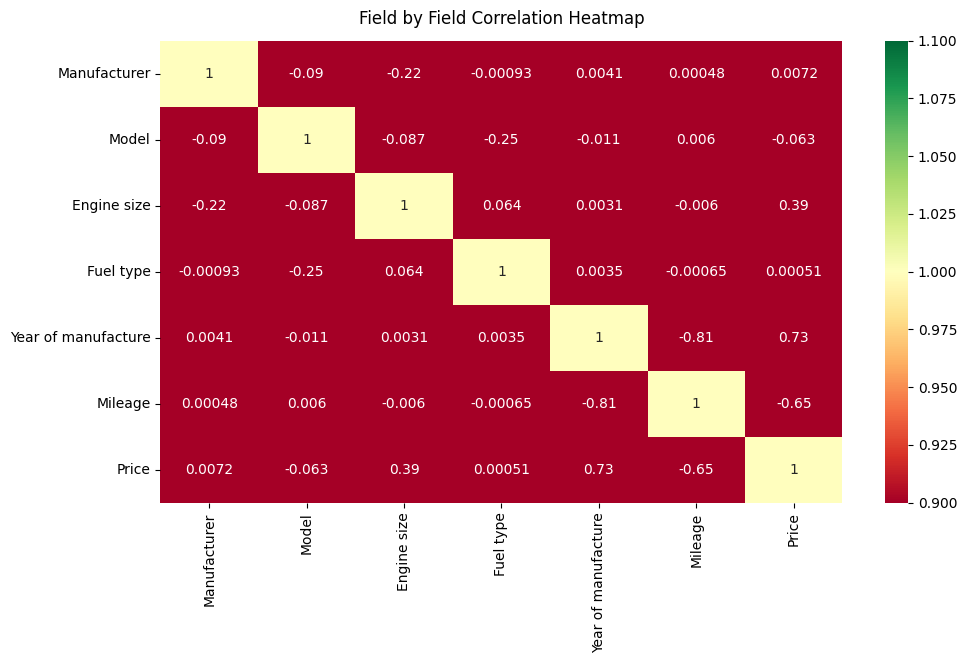

In [25]:
plt.figure(figsize=(11, 6))
mat = sns.heatmap(dfcopy_trans.corr(), vmin = 1, vmax = 1, annot = True, cmap = "RdYlGn")
mat.set_title("Field by Field Correlation Heatmap", fontsize = 12, pad = 12);
plt.show()

#### There are no features with 100% correlation based on the above matrix

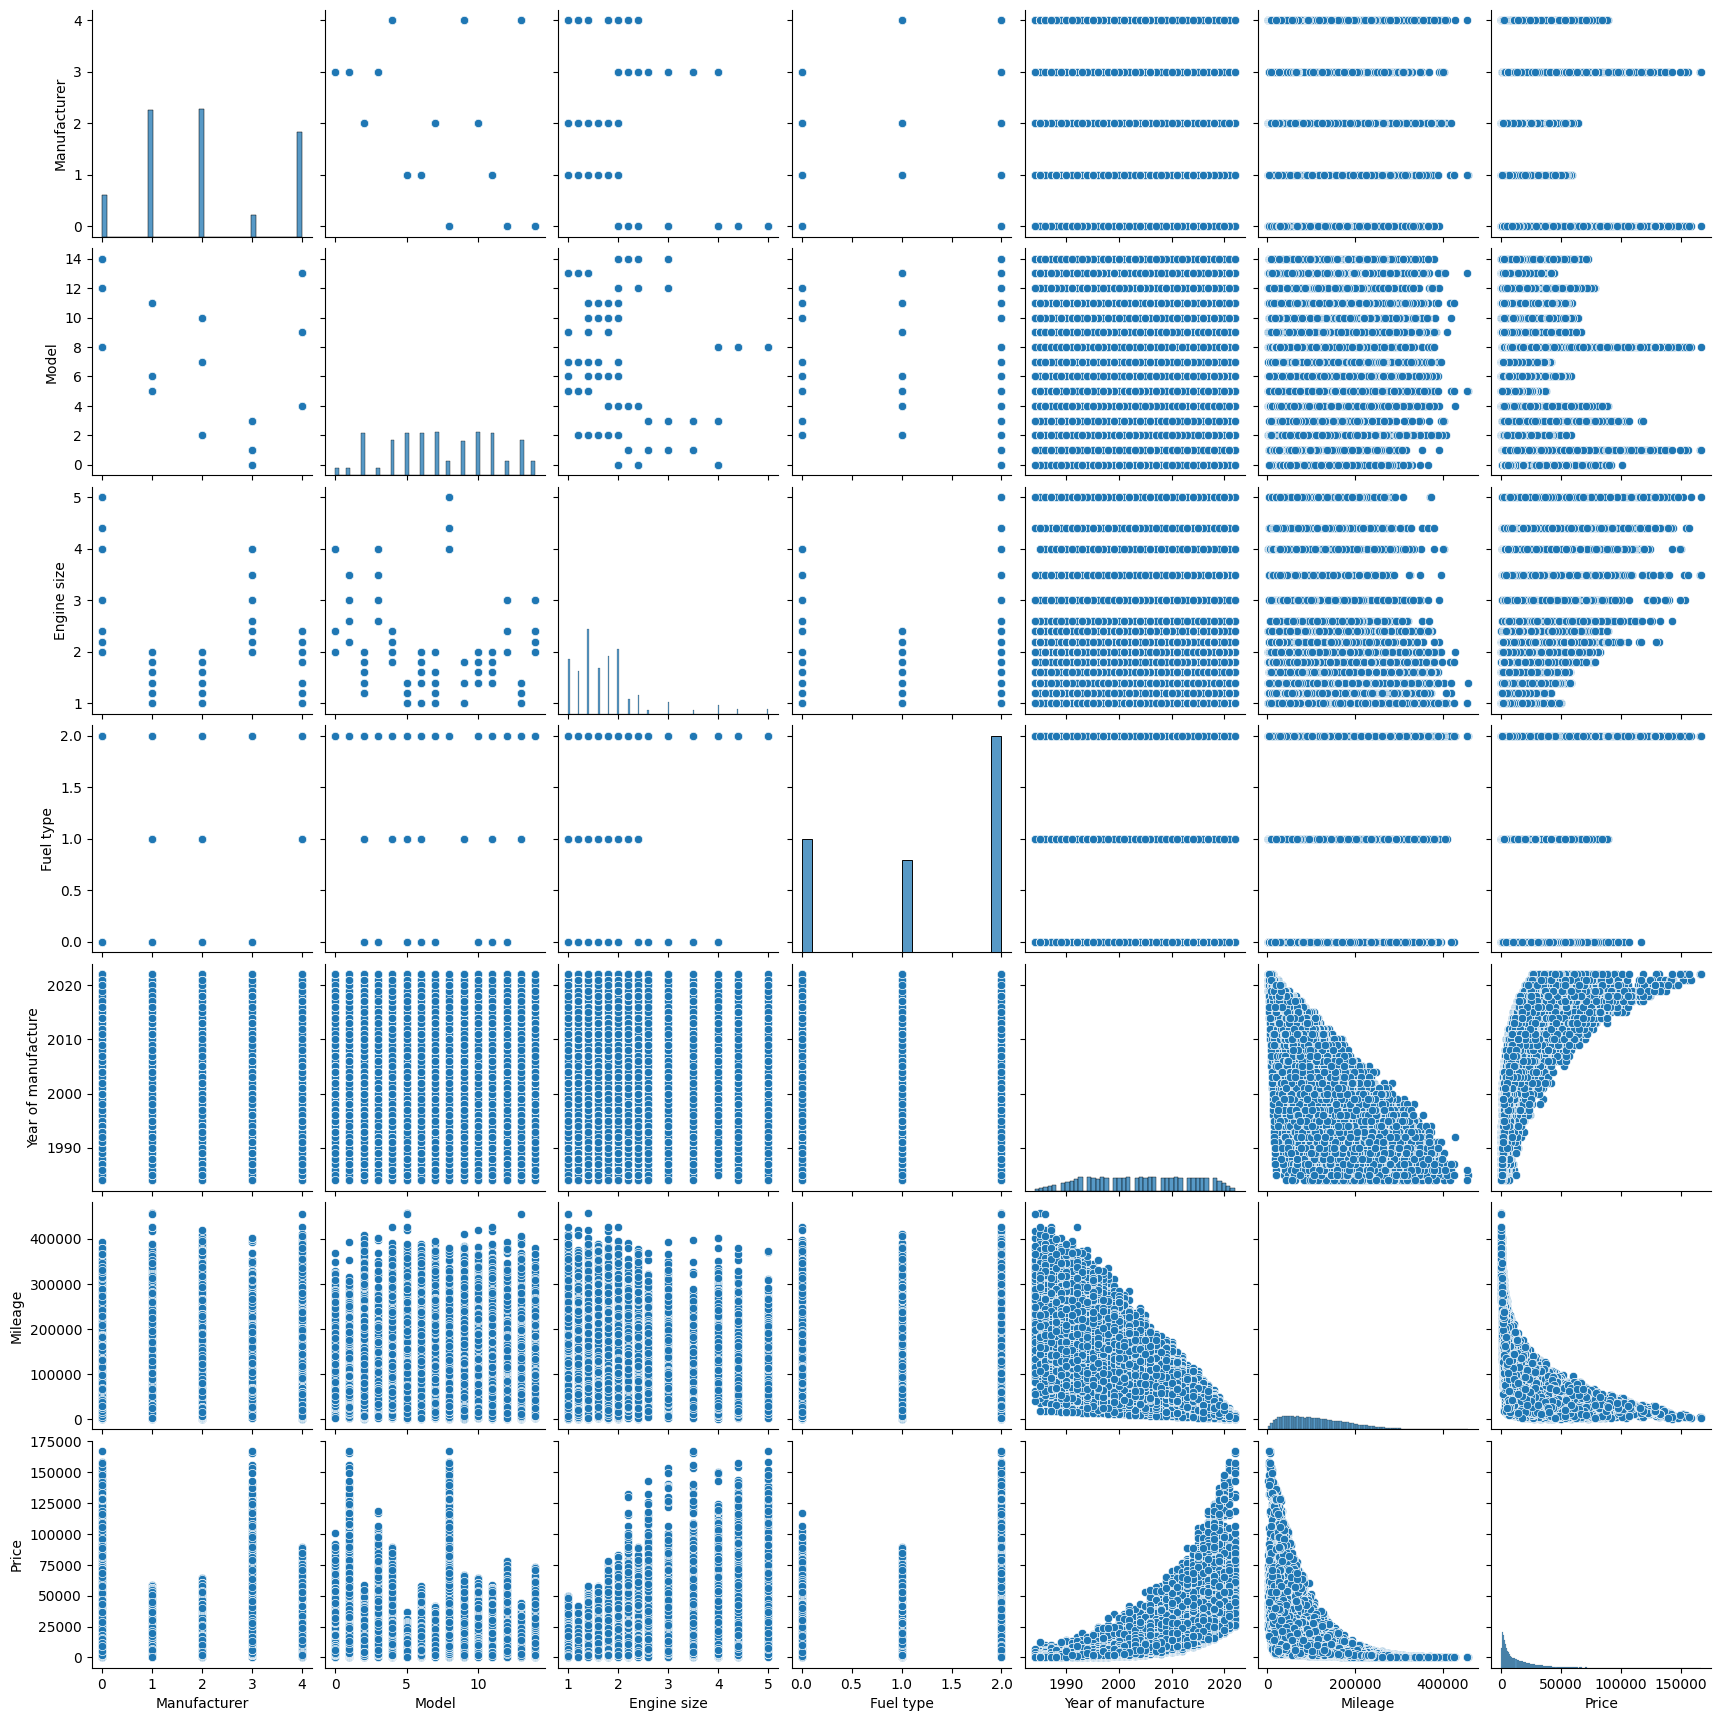

In [26]:
sns.pairplot(dfcopy_trans)

### 5. Capping High Float Precision

In [27]:
dfcopy = mydf1.round(decimals = 2)

In [28]:
dfcopy.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Puma,1.4,Diesel,1994,157846,2517
1,BMW,X3,2.0,Diesel,1999,311477,1220
2,BMW,X3,3.0,Diesel,2004,46905,18888
3,Toyota,Matrix,1.4,Hybrid,1985,226031,955
4,Ford,Puma,1.8,Diesel,1995,168255,2796


### 6. Checking for Constant Fields

In [29]:
for col in dfcopy.columns:
    counts = dfcopy[col].value_counts()
    if len(counts) == 1:
        print("Column" + col + "is a constant value of" + str(counts.index[0]))

#### There is no column with a single consistent value

### 7. Checking Field and Recod Level Outliers

In [30]:
# To display the numerical columns;

for col in dfcopy.columns:
    if col not in nom_col:
        print(col)

Engine size
Year of manufacture
Mileage
Price


#### There 4 non categorical features in the dataset, including "Engine type", "Year of manufacture", "Mileage", and "Price"

### 7.1 Field level Outliers

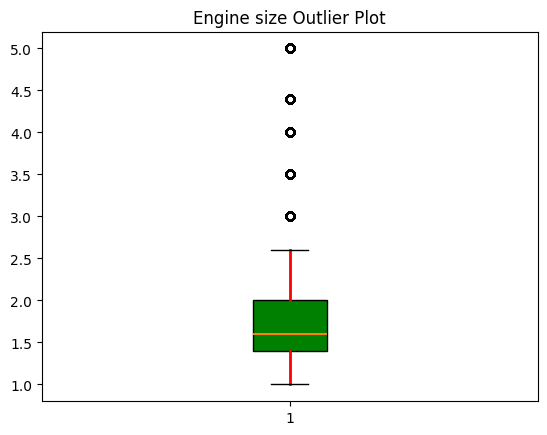

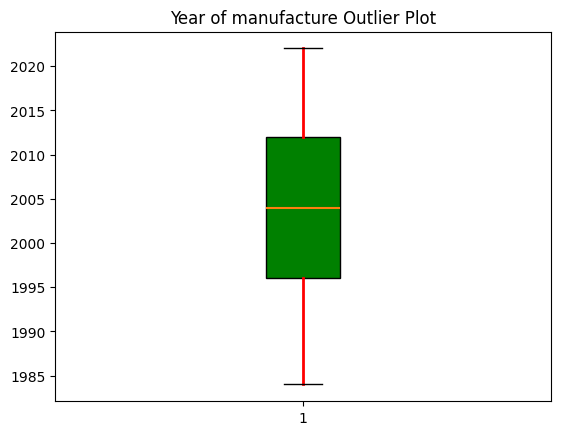

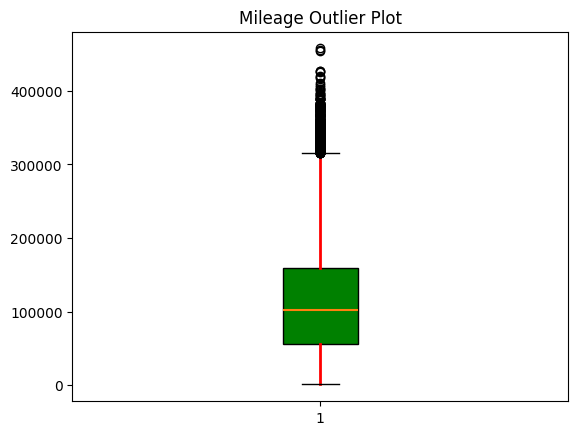

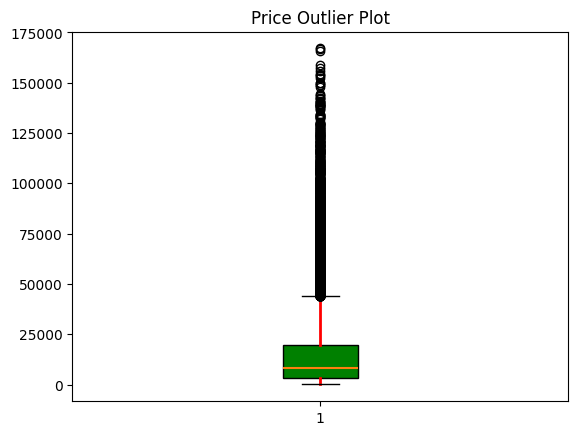

In [31]:
fig1, ax1 = plt.subplots()
outlier_col = "Engine size"
ax1.set_title("Engine size Outlier Plot")
ax1.boxplot(dfcopy[outlier_col], patch_artist = True, boxprops = dict(facecolor = "green"), 
            medianprops = dict(linewidth = 1.5), whiskerprops = dict(color = "red", linewidth = 2))

plt.show()

fig1, ax1 = plt.subplots()
outlier_col = "Year of manufacture"
ax1.set_title("Year of manufacture Outlier Plot")
ax1.boxplot(dfcopy[outlier_col], patch_artist = True, boxprops = dict(facecolor = "green"), 
            medianprops = dict(linewidth = 1.5), whiskerprops = dict(color = "red", linewidth = 2))

plt.show()

fig1, ax1 = plt.subplots()
outlier_col = "Mileage"
ax1.set_title("Mileage Outlier Plot")
ax1.boxplot(dfcopy[outlier_col], patch_artist = True, boxprops = dict(facecolor = "green"), 
            medianprops = dict(linewidth = 1.5), whiskerprops = dict(color = "red", linewidth = 2))

plt.show()

fig1, ax1 = plt.subplots()
outlier_col = "Price"
ax1.set_title("Price Outlier Plot")
ax1.boxplot(dfcopy[outlier_col], patch_artist = True, boxprops = dict(facecolor = "green"), 
            medianprops = dict(linewidth = 1.5), whiskerprops = dict(color = "red", linewidth = 2))

plt.show()

#### From the above box plots, "Engine size", "Mileage", and "Price" have outliers. These were maintained because they were considered to be valid records. Based on this, investingating record level outliers (Steier, 2023) was not found necessary.

## Data Cleaning Report

#### - The dataset has 55,000 rows and 7 columns
#### - Features included, "Manufacturer", "Model", "Engine size", "Fuel type", "Year of manufacture", "Mileage", and "Price".
#### - Of the 7 features, 3 were categorical, inluding "Manufacturer", "Model", and "Fuel type".
#### - There were no empty fields
#### - There were 12 diplicate records that were maintained
#### - No field was found to be redundant but correlations existed between, Price and Year of manufacture, Price and Mileage and Mileage and Year of manufacture
#### - No column had a single consistent value
#### - Engine size, Year of mufacture, Mileage, and Price had field level outliers.

#### To normalise the data

In [73]:
dfcopy

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Puma,1.4,Diesel,1994,157846,2517
1,BMW,X3,2.0,Diesel,1999,311477,1220
2,BMW,X3,3.0,Diesel,2004,46905,18888
3,Toyota,Matrix,1.4,Hybrid,1985,226031,955
4,Ford,Puma,1.8,Diesel,1995,168255,2796
...,...,...,...,...,...,...,...
54995,Ford,Focus,1.6,Petrol,2004,130139,6301
54996,Ford,Fiesta,1.2,Petrol,1988,260534,416
54997,Toyota,Yaris,1.2,Hybrid,2010,57107,13763
54998,Ford,Puma,1.8,Hybrid,2011,66945,20061
